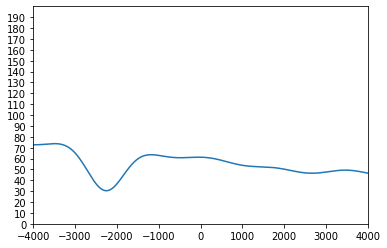

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

def _get_random_variation(rstart, rend):
    var = rstart + (rend-rstart)*np.random.random(1)
    return var

curve_slope = _get_random_variation(-0.004, -0.001)
curve_height = 30
wave_size = 2
wave_start = _get_random_variation(0, 10000)
curve_waviness = _get_random_variation(500, 1400)
sig = _get_random_variation(300, 1200)
mu = _get_random_variation(-2500, 2500)
scale_fact = 100*sig
direction = np.random.choice([-1,1])

x = np.linspace(-4000, 4000, 20000)
y_points = curve_slope*x + curve_height  + wave_size*np.sin((x-wave_start)/curve_waviness) + \
   (wave_size/1.5)*np.sin((x-(wave_start))/(curve_waviness/2)) + \
   (wave_size/1.5)*np.sin((x-(wave_start))/(curve_waviness/4))

norm = (1/(sig*np.sqrt(2*np.pi)))*np.exp((-1*(x-mu)**2)/(2*sig**2))
y_points = curve_slope*x + curve_height + y_points + norm * scale_fact * direction


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-4000,4000])
ax.set_yticks(np.arange(0,200,10))
ax.set_ylim([0,200])

ax.plot(x,y_points)

plt.show()



